# Single Halo Bossting factor evaluation


For pessimistic model we adopt standard NFW \cite{1997ApJ...490..493N}. In the realistic and optimistic scenario stteper inner slope can increase boosting factor. Therefore we also use modified NFW profile can be written as:
\begin{equation}
\rho(r) = \dfrac{\rho_0}{(r/r_S)^\alpha(1+r/r_S)^{(3-\alpha)}},
\end{equation}
where an additional parameter \alpha emerges. For standard NFW $\alpha=1$.

In [1]:
%matplotlib inline
from colossus.Cosmology import *
from colossus.HaloConcentration import *
from colossus.HaloDensityProfile import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import betainc

from dmb.single_halo import *

setCosmology('planck13')
cosmo = getCurrent()

Halo mass:  -6.0 ; Redshift:  30 ; Concentration:  2.91462869355 ; Inner slope (alpha):  1.461
Numerical  boosting factor:  241.369344404
Analytical boosting factor (for alpha=1):  7.15289939013


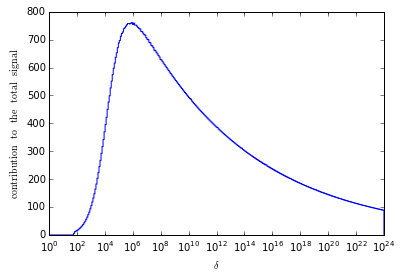

In [2]:
M = 1e-6# in Solar masses
z = 30   # redshift
c = concentration(M, 'vir', z, model='diemer15')
alpha = IshiyamaAlpha(M)

rhom = (AST_rho_crit_0_kpc3*cosmo.Om0*(1.+z)**3)

delta_list = np.logspace(0, 24, 330)
profile = NFWProfile(M=M, mdef='vir', z=z, c=c)
rho0, rs = profile.fundamentalParameters(M, c, z, 'vir')
Rmax= c*rs
R = np.logspace(np.log10(Rmax)-24, np.log10(Rmax), 100000)
rho = NFWa(R, rs, rho0, alpha=alpha)
V = np.concatenate([[0], 4./3.*np.pi*R**3])
V = np.diff(V)
rho2V = rho**2*V
rho0, rs = profile.fundamentalParameters(M, c, z, 'vir')
V = 4./3.*np.pi*(c*rs)**3

B_nu = HaloBoost(z, M, c, alpha)
B_an = rho0**2 / c**3  * V**2 / M**2

print 'Halo mass: ', np.log10(M), '; Redshift: ', z, '; Concentration: ', c, '; Inner slope (alpha): ', alpha
print 'Numerical  boosting factor: ', B_nu
print 'Analytical boosting factor (for alpha=1): ', B_an

plt.hist(rho/rhom, bins=delta_list, weights=rho2V, histtype='step')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\mathrm{contribution\;to\;the\;total\;signal}$')

## Average boosting factor for a halo of given mass with some scatter in concentration

In [3]:
print HaloBoost_c(z, M, c, alpha, 0.2)
print HaloBoost(z, M, c, alpha)

309.105959178
241.369344404
